<h1>Direct problem</h1>
<p>This package's purpose is to implement the resolution of the system of partial differential equations (pde):</p>


$$\left\lbrace\begin{aligned}
    &\frac{\partial u}{\partial t} - \alpha \frac{\partial^2 u}{\partial x^2} = a(u - v)\\
    &\frac{\partial u}{\partial t} - \beta \frac{\partial^2 v}{\partial x^2} = b(v - u)\\
    &u(x, 0) = v(x, 0) = f(x)
\end{aligned}\right.$$

We first create an instance of ToyProblem passing along the parameters of the problem:

In [1]:
import numpy as np

from direct_problem import ToyProblem


f = lambda x: np.maximum(2-x, 0)

problem = ToyProblem(
    alpha=1.2,
    beta=0.8,
    a=2,
    b=0.5,
    solution_at_t_equal_zero=f)

The resolution of the problem will take place on a grid $[x_{min}, x_{max}]\times[0, t_{max}]$ discretized according to some $\delta_x$ and $\delta_t$:

In [2]:
from direct_problem import Grid

grid = Grid(
    x_min=0,
    x_max=5,
    delta_x=0.2,
    t_max=1,
    delta_t=0.01
)



<p>This system of pde will be considered together with the boundaries conditions </p>

$$\left\lbrace\begin{aligned}
    &u(x_{min}, t) = v(x_{min}, t) = f(x_{min}),\ t\in [0, t_{max}]\\
    &u(x_{max}, t) = v(x_{max}, t) = f(x_{max}),\ t\in [0, t_{max}]
\end{aligned}\right.$$

To do so, we need to associate the grid to the problem and call init_boundaries:

In [3]:
problem.set_grid(grid) 
problem.init_boundaries() 

The solver implement a explicit Euler's schem where derivatives are aproximated by
$$\frac{\partial w}{\partial t}(x, t) \simeq \frac{w(x, t + \delta_t) - w(x, t)}{\delta_t}$$
$$\frac{\partial^2 w}{\partial x^2}(x, t) \simeq \frac{w(x + \delta_x, t) - 2w(x, t) + w(x - \delta_x, t)}{\delta_x^2}$$
<!-- TODO Add the final formulas that summarize the schem--> 

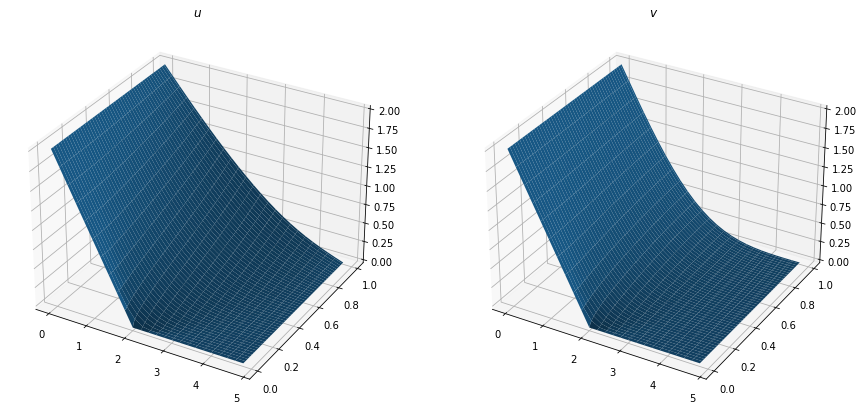

In [4]:
from direct_problem import CSFTSolver


solver = CSFTSolver(problem)

# Solve return a tuple containing the two solutions
u, v = solver.solve()

# Plot give us a graphical representation of the solutions
solver.plot(notebook=True)
